In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# players_21 data files
players_data_path = "data/players_21.csv"

# Read the players data
df = pd.read_csv(players_data_path)

# Display the data table for preview
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [3]:
# Drop missing 
#df = df.dropna()

In [4]:
# Check height and weight columns if they have the appropriate data type (should be in integers int64)
df[['height_cm', 'weight_kg']].dtypes

height_cm    int64
weight_kg    int64
dtype: object

In [5]:
# Check datatype of 'joined' column
df['joined'].dtypes

dtype('O')

In [6]:
# Convert 'joined' column into datatime, 
df['joined'] = pd.to_datetime(df['joined'], errors='coerce')

# then extract the year, month, and day into 3 separate cols
df['joined_year'] = df['joined'].dt.year
df['joined_month'] = df['joined'].dt.month
df['joined_day'] = df['joined'].dt.day

# Display the results
df[['joined', 'joined_year', 'joined_month', 'joined_day']].head()

,joined,joined_year,joined_month,joined_day
0,2004-07-01,2004.0,7.0,1.0
1,2018-07-10,2018.0,7.0,10.0
2,2014-07-16,2014.0,7.0,16.0
3,2014-07-01,2014.0,7.0,1.0
4,2017-08-03,2017.0,8.0,3.0


In [7]:
# Check datatype of 'value, wage, release clause' cols
df[['value_eur', 'wage_eur', 'release_clause_eur']].dtypes

value_eur               int64
wage_eur                int64
release_clause_eur    float64
dtype: object

In [8]:
# Convert float to int
df['release_clause_eur'] = df['release_clause_eur'].fillna(0).astype(int)

# Verify the change
df[['release_clause_eur']].dtypes

release_clause_eur    int32
dtype: object

In [9]:
# Display the results of the 3 cols
df[['value_eur', 'wage_eur', 'release_clause_eur']].head()

,value_eur,wage_eur,release_clause_eur
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,80000000,240000,132000000
4,90000000,270000,166500000


In [10]:
df['contract_valid_until'].dtypes

dtype('float64')

In [11]:
# Convert to int
df['contract_valid_until'] = df['contract_valid_until'].fillna(0).astype(int)

In [12]:
# Check if there's missing values in the dataset
missing_values = df.isnull().sum()
missing_values

sofifa_id         0
player_url        0
short_name        0
long_name         0
age               0
               ... 
rcb               0
rb                0
joined_year     983
joined_month    983
joined_day      983
Length: 109, dtype: int64

## Analyzing Contract Expiration Trend
- Explore trends in contract expiration dates across clubs or nationalities

In [14]:
# 

## Player Performance vs Wage
- Analyze if higher wages correlate with better player performance ratings.

In [16]:
# Extract relevant columns for analysis (wage and overall rating)
df_performance = df[['wage_eur', 'overall']]

In [17]:
# Exclude the players with a wage of zero from thsi analysis, as they could be outliers or represent missing data
# which could distort the results
df_performance = df_performance[df_performance['wage_eur'] > 0]

In [18]:
#  Check for any missing data and clean if necessary
df_performance = df_performance.dropna()

In [19]:
# Define wage bins
wage_bins = [0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]  # Define wage ranges
wage_labels = ['0-10K', '10K-20K', '20K-50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M']

In [20]:
# Bin the wages
df_performance['wage_bin'] = pd.cut(df_performance['wage_eur'], bins=wage_bins, labels=wage_labels)

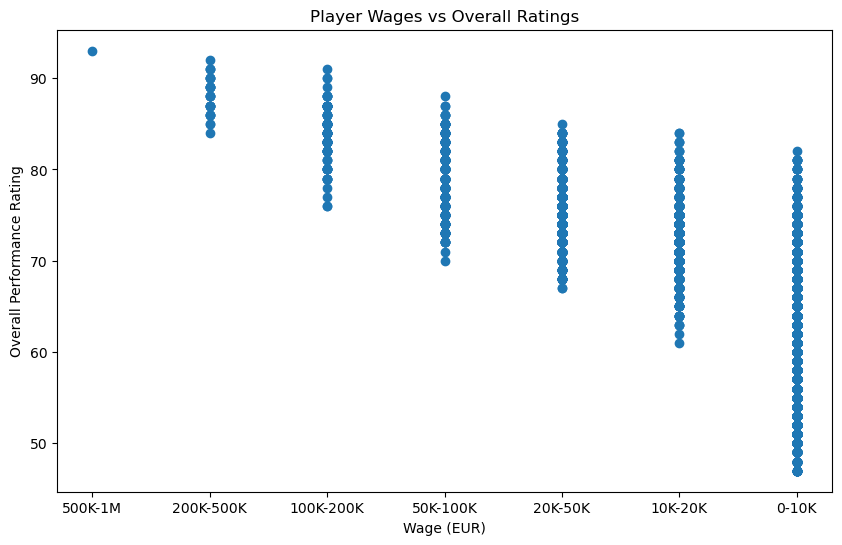

In [21]:
# Step 3: Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df_performance['wage_bin'],df_performance['overall'])
plt.title('Player Wages vs Overall Ratings')
plt.xlabel('Wage (EUR)')
plt.ylabel('Overall Performance Rating')
plt.show()

In [22]:
# Calculate the correlation coefficient
correlation = df_performance['wage_eur'].corr(df_performance['overall'])
print(f"Correlation between wage and overall performance: {correlation}")

Correlation between wage and overall performance: 0.5809282477363932


- A correlation coefficient of 0.5809 indicates a moderate positive relationship between player wages and overall performance ratings.


In [24]:
# Calculate a linear regression model
model = st.linregress(df_performance['wage_bin'],df_performance['overall'])

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Plot the scatter plot with regression
y_values = capomulin_average['Weight (g)']*model[0]+model[1]

In [ ]:
# Step 3: Group by wage_bin and calculate summary statistics for overall performance
summary_stats_binned = df_performance.groupby('wage_bin')['overall'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the binned summary statistics
summary_stats_binned

- Comparing the mean overall ratings across the wage bins. The higher wage bins have significantly higher mean overall ratings, the players with higher wages generally perform better
- The median across wage bins follows the same pattern as the mean (increasing with wage), it supports the observation that hgiher wages are associated with better players.
- Variance for the lower wage bin 0-10k is high, this means there's a large spread in the overall ratings. It has mixed performance levels, with both high and low performers.

In [ ]:
# Create the bar graph
mean_performance_by_bin = df_performance.groupby('wage_bin')['overall'].mean()

plt.figure(figsize=(10, 6))
mean_performance_by_bin.plot(kind='bar')
plt.title('Mean Overall Performance by Wage Bin')
plt.xlabel('Wage Bin (EUR)')
plt.ylabel('Mean Overall Performance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a boxplot for Wages
box_data = [df_performance[df_performance['wage_bin'] == label]['overall'] for label in wage_labels]

plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=wage_labels, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'))

plt.title('Distribution of Overall Performance Ratings by Wage Bin')
plt.xlabel('Wage Bin (EUR)')
plt.ylabel('Overall Performance Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Position Analysis
- Analyze which positions (forwards, midfielders, etc) have the highest overall ratings or wage

In [25]:
# Create a data frame of the analysis of performance

#Calculate the Analysis
minimum = df['overall'].min()
Q1 = df['overall'].quantile(0.25)
median = df['overall'].median()
Q3 = df['overall'].quantile(0.75)
maximum = df['overall'].max()

#Create a dictionary for the DFs

analysis_of_performance = {
    'Minimum': minimum,
    'Q1 (25th Percentile)': Q1,
    'Median (50th Percentile)': median,
    'Q3 (75th Percentile)': Q3,
    'Maximum': maximum
}

# Create a DataFrame from the dictionary
analysis_of_performance_df = pd.DataFrame(analysis_of_performance, index=[0])

# Display the DataFrame
display(analysis_of_performance_df)



,Minimum,Q1 (25th Percentile),Median (50th Percentile),Q3 (75th Percentile),Maximum
0,47,61.0,66.0,70.0,93


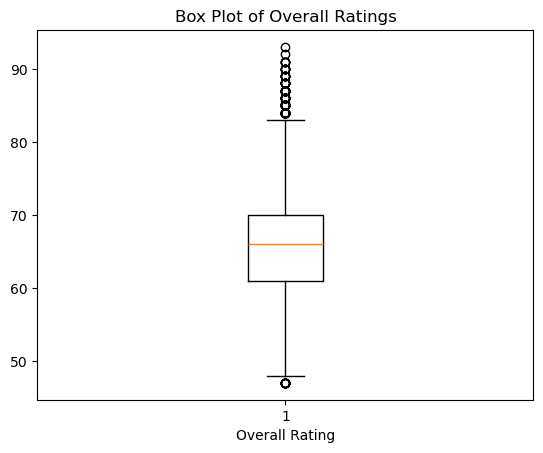

In [27]:

plt.boxplot(df['overall'])  

# Add titles and labels
plt.title('Box Plot of Overall Ratings')
plt.xlabel('Overall Rating')

# Show the plot
plt.show()

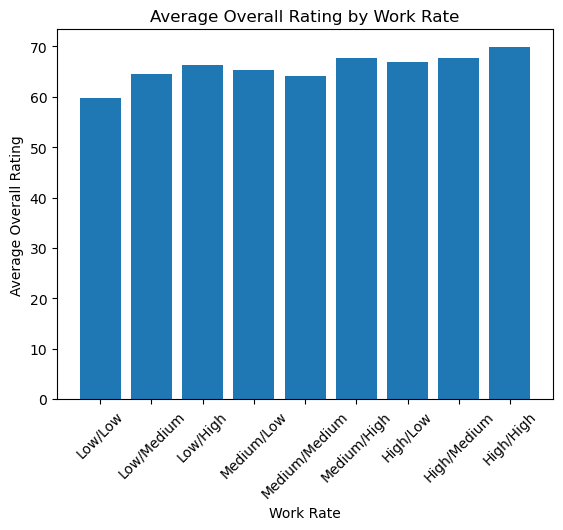

In [29]:
# Desired order of player positions
work_order = ['Low/Low', 'Low/Medium', 'Low/High', 'Medium/Low', 'Medium/Medium', 'Medium/High', 'High/Low', 'High/Medium', 'High/High']

# Calculate the average overall rating for each player position
avg_overall_by_work_rate = df.groupby('work_rate')['overall'].mean().reset_index()

# Convert player_position to a categorical type with the specified order
avg_overall_by_work_rate['work_rate'] = pd.Categorical(avg_overall_by_work_rate['work_rate'], categories=work_order, ordered=True)

# Sort the DataFrame by the ordered work_rate
avg_overall_by_work_rate = avg_overall_by_work_rate.sort_values('work_rate')

# Create the bar graph
plt.bar(avg_overall_by_work_rate['work_rate'], avg_overall_by_work_rate['overall'])

# Add titles and labels
plt.title('Average Overall Rating by Work Rate')
plt.xlabel('Work Rate')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)

# Show the plot
plt.show()


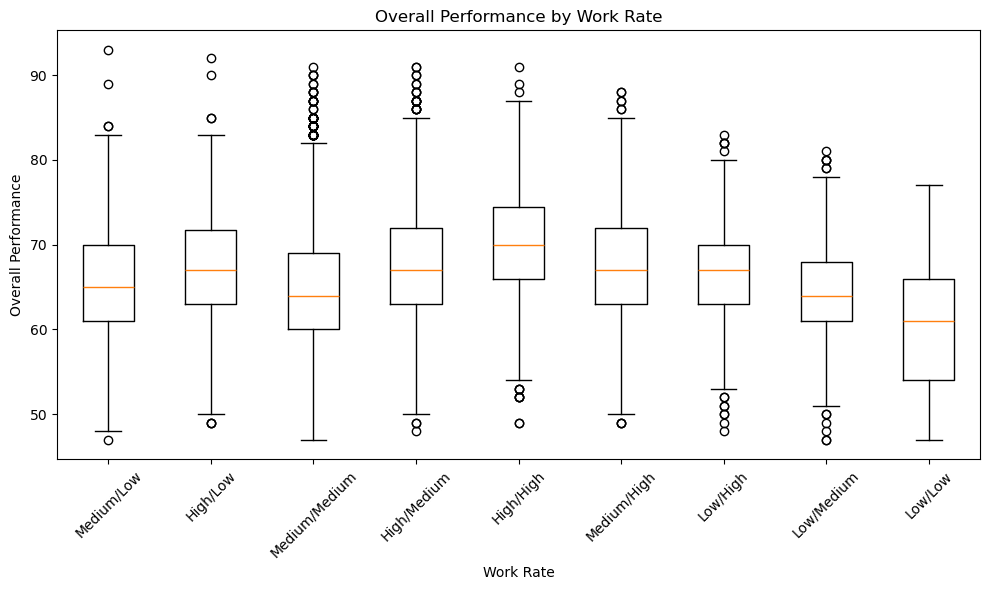

In [31]:
# Ensure there are no NaN values in the 'work_rate' and 'overall' columns
work_rate_clean_df = df.dropna(subset=['work_rate', 'overall'])

# Group the data by work_rate
work_rate_groups = [work_rate_clean_df[work_rate_clean_df['work_rate'] == rate]['overall'] for rate in work_rate_clean_df['work_rate'].unique()]

# Create side-by-side box plots
plt.figure(figsize=(10, 6))
plt.boxplot(work_rate_groups, labels=work_rate_clean_df['work_rate'].unique())

# Add title and labels
plt.title('Overall Performance by Work Rate')
plt.xlabel('Work Rate')
plt.ylabel('Overall Performance')

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Performing ANOVA
anova_result = st.f_oneway(
    df[df['work_rate'] == 'Low/Low']['overall'],
    df[df['work_rate'] == 'Low/Medium']['overall'],
    df[df['work_rate'] == 'Low/High']['overall'],
    df[df['work_rate'] == 'Medium/Low']['overall'],
    df[df['work_rate'] == 'Medium/Medium']['overall'],
    df[df['work_rate'] == 'Medium/High']['overall'],
    df[df['work_rate'] == 'High/Low']['overall'],
    df[df['work_rate'] == 'High/Medium']['overall'],
    df[df['work_rate'] == 'High/High']['overall']
)

print('ANOVA result:', anova_result)



In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['overall'],    
                          groups=df['work_rate'],  
                          alpha=0.05)            

# Display the test results
print(tukey)


In [ ]:
# Create a new column 'contract length' as the difference between 'contract_valid_until' and 'joined_year'
contract_df = df[['overall', 'joined_year', 'contract_valid_until']].copy()
contract_df['contract length'] = (contract_df['contract_valid_until'] - contract_df['joined_year'] + 1)
contract_df_clean = contract_df.dropna()

In [ ]:
#Calculate the Analysis
minimum_2 = contract_df_clean['contract length'].min()
Q1_2 = contract_df_clean['contract length'].quantile(0.25)
median_2 = contract_df_clean['contract length'].median()
Q3_2 = contract_df_clean['contract length'].quantile(0.75)
maximum_2 = contract_df_clean['contract length'].max()

#Create a dictionary for the DFs

analysis_of_contract = {
    'Minimum': minimum_2,
    'Q1 (25th Percentile)': Q1_2,
    'Median (50th Percentile)': median_2,
    'Q3 (75th Percentile)': Q3_2,
    'Maximum': maximum_2
}

# Create a DataFrame from the dictionary
analysis_of_contract_df = pd.DataFrame(analysis_of_contract, index=[0])

# Display the DataFrame
display(analysis_of_contract_df)


In [ ]:
plt.boxplot(contract_df_clean['contract length'])  

# Add titles and labels
plt.title('Box Plot of Contract Length')
plt.xlabel('Contract Length')

# Show the plot
plt.show()

In [ ]:
# Ensure there are no NaN values in the cleaned DataFrame
contract_clean_df = contract_df_clean.dropna(subset=['contract length', 'overall'])

# Define the variables for regression
contract_length = contract_clean_df['contract length']  
overall_performance = contract_clean_df['overall']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(contract_length, overall_performance)

# Create regression line values
regress_values = slope * contract_length + intercept

# Create equation line for annotation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create correlation coefficient string
correlation_eq = f"R = {round(r_value, 2)}"

# Step 6: Graph
plt.scatter(contract_length, overall_performance, label='Data Points')
plt.plot(contract_length, regress_values, 'r-', label='Regression Line')
plt.title('Contract Length vs. Overall Performance')
plt.xlabel('Contract Length')
plt.ylabel('Overall Performance')
plt.legend()

# Annotate the equation and correlation on the graph
plt.annotate(line_eq, (0.05, 0.85), fontsize=12, color='red', xycoords='axes fraction')
plt.annotate(correlation_eq, (0.05, 0.80), fontsize=12, color='blue', xycoords='axes fraction')

# Show the plot
plt.show()

# Print R-squared value
print(f"R²: {r_value**2}")



